# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [21]:
from commonfunctions import *
import skimage
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
'''
1. Built-in Sobel, Prewill, Roberts
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''

'\n1. Built-in Sobel, Prewill, Roberts\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n'

In [23]:
# 1. Built-in Sobel, Prewill, Roberts

img = rgb2gray(io.imread('circuit.tif'))




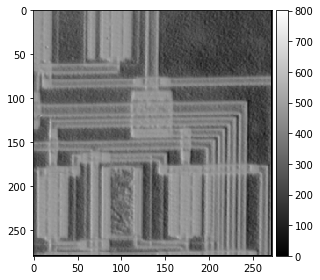

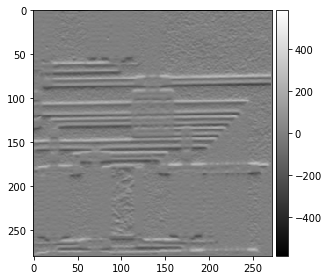

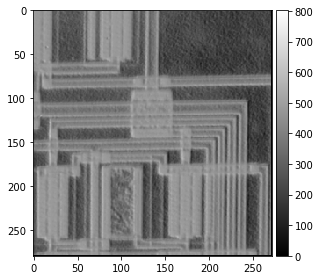

In [27]:
# 2. Custom Sobel (V-H-Both)

img = rgb2gray(io.imread('circuit.tif'))
hy=[[1,0,1],[-2,0,2],[-1,0,1]]
hx=[[-1,-2,-1],[0,0,0],[1,2,1]]
img = (img*255).astype(np.uint8)

def Mult_(A,C):
    res=0
    for i in range(3):
        for j in range (3):
            res+=int(A[i][j]*C[i][j])

    return res




Dim=np.shape(img)
#ExtendendMatrix=np.zeros(1+Dim[0],1+Dim[1])
WindowWidth=3
WindowHeight=3

EdgeX=(int)(WindowWidth/2)
EdgeY=(int)(WindowWidth/2)

XEdges=np.zeros((Dim[0],Dim[1]))
YEdges=np.zeros((Dim[0],Dim[1]))
EDGE_=np.zeros((Dim[0],Dim[1]))

for i in range(Dim[0]-EdgeX):
    for j in range (Dim[1]-EdgeY):
        CurrFilter=np.zeros((WindowWidth,WindowHeight))
        for fx in range(WindowWidth):
            for fy in range (WindowHeight):
                CurrFilter[fx][fy]=img[i+fx-EdgeX][j+fy-EdgeY]
        XEdges[i][j]=Mult_(CurrFilter,hx)
        YEdges[i][j]=Mult_(CurrFilter,hy)
        EDGE_[i][j]=np.sqrt(XEdges[i][j]**2+ YEdges[i][j]**2)
io.imshow(YEdges,cmap="gray") # 0~255 np.zeros((2, 1))
io.show()

io.imshow(XEdges,cmap="gray") # 0~255 np.zeros((2, 1))
io.show()
io.imshow(EDGE_,cmap="gray") # 0~255 np.zeros((2, 1))
io.show()



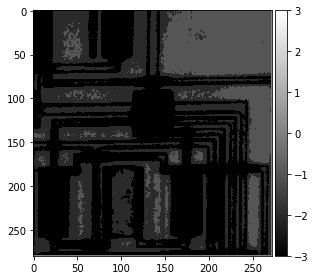

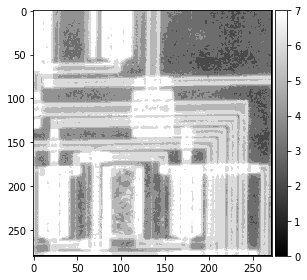

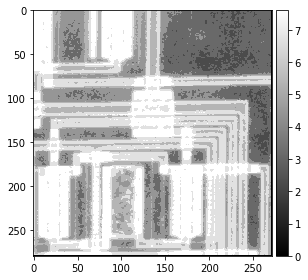

In [30]:
# 3. Custom LoG
thres= 20

img = rgb2gray(io.imread('circuit.tif'))
f1=[[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]
f2=[[0,1,0],[1,-4,1],[0,1,0]]
img = (img*255).astype(np.uint8)
img=skimage.filters.gaussian(img, sigma=0.2, output=None, mode='nearest', cval=0, multichannel=None, preserve_range=False, truncate=4.0)
def Mult_(A,C):
    res=0
    for i in range(3):
        for j in range (3):
            res+=int(A[i][j]*C[i][j])

    return res




Dim=np.shape(img)
#ExtendendMatrix=np.zeros(1+Dim[0],1+Dim[1])
WindowWidth=3
WindowHeight=3

EdgeX=(int)(WindowWidth/2)
EdgeY=(int)(WindowWidth/2)

XEdges=np.zeros((Dim[0],Dim[1]))
YEdges=np.zeros((Dim[0],Dim[1]))
EDGE_=np.zeros((Dim[0],Dim[1]))

for i in range(Dim[0]-EdgeX):
    for j in range (Dim[1]-EdgeY):
        CurrFilter=np.zeros((WindowWidth,WindowHeight))
        for fx in range(WindowWidth):
            for fy in range (WindowHeight):
                CurrFilter[fx][fy]=img[i+fx-EdgeX][j+fy-EdgeY]
        XEdges[i][j]=Mult_(CurrFilter,f1)
        YEdges[i][j]=Mult_(CurrFilter,f2)
        if np.sqrt(XEdges[i][j]**2+ YEdges[i][j]**2)<thres:
            
            EDGE_[i][j]=np.sqrt(XEdges[i][j]**2+ YEdges[i][j]**2)
        else:
                EDGE_[i][j]=0
io.imshow(YEdges,cmap="gray") # 0~255 np.zeros((2, 1))
io.show()

io.imshow(XEdges,cmap="gray") # 0~255 np.zeros((2, 1))
io.show()
io.imshow(EDGE_,cmap="gray") # 0~255 np.zeros((2, 1))
io.show()
